In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def load_and_clean_data(csv_path):
    """Carga el CSV y limpia datos."""
    df = pd.read_csv(csv_path)
    
    # Convertir columnas numéricas
    numeric_cols = [col for col in df.columns if col not in ['fmt', 'k_new', 'use_dense_vg', 'step4_error', 'step4_fast_error']]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

In [12]:
def plot_step(df, step_name, time_col, xaxis='n_cols', outdir='results/plots', show=True):
    """
    Genera un gráfico para un paso específico.
    
    Args:
        df: DataFrame con los datos
        step_name: Nombre del paso para el título
        time_col: Columna con los tiempos a graficar
        xaxis: Columna para eje X (n_cols o n_rows)
        outdir: Directorio de salida
        show: Si mostrar el gráfico
    """
    # Filtrar solo filas con datos para este paso
    df_step = df[df[time_col].notna()].copy()
    
    if df_step.empty:
        print(f"⚠️  Sin datos para {step_name}, saltando...")
        return
    
    # Obtener formatos únicos
    formats = df_step['fmt'].unique()
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Colores y markers para cada formato
    colors = {'lil': 'blue', 'csc': 'green', 'csr': 'red', 'dok': 'orange', 'coo': 'purple'}
    markers = {'lil': 'o', 'csc': 's', 'csr': '^', 'dok': 'D', 'coo': 'v'}
    
    # Graficar cada formato
    for fmt in sorted(formats):
        df_fmt = df_step[df_step['fmt'] == fmt].sort_values(xaxis)
        
        if not df_fmt.empty:
            ax.plot(df_fmt[xaxis], df_fmt[time_col], 
                   marker=markers.get(fmt, 'o'),
                   color=colors.get(fmt, 'black'),
                   label=fmt,
                   linewidth=2,
                   markersize=8)
    
    # Configurar ejes
    ax.set_xlabel(f'Tamaño de entrada ({xaxis})', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tiempo (segundos)', fontsize=12, fontweight='bold')
    ax.set_title(f'{step_name} - Tiempo vs {xaxis}', fontsize=14, fontweight='bold')
    
    # Escala logarítmica en Y si hay mucha variación
    max_time = df_step[time_col].max()
    min_time = df_step[time_col].min()
    if max_time / min_time > 10:
        ax.set_yscale('log')
        ax.set_ylabel('Tiempo (segundos, escala log)', fontsize=12, fontweight='bold')
    
    # Grid y leyenda
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(title='Formato', fontsize=10, title_fontsize=11)
    
    # Ajustar layout
    plt.tight_layout()
    
    
    
    if show:
        plt.show()
    else:
        plt.close()

Cargando datos desde benchmark.csv...
✓ Cargadas 15 filas

Generando 6 gráficos...


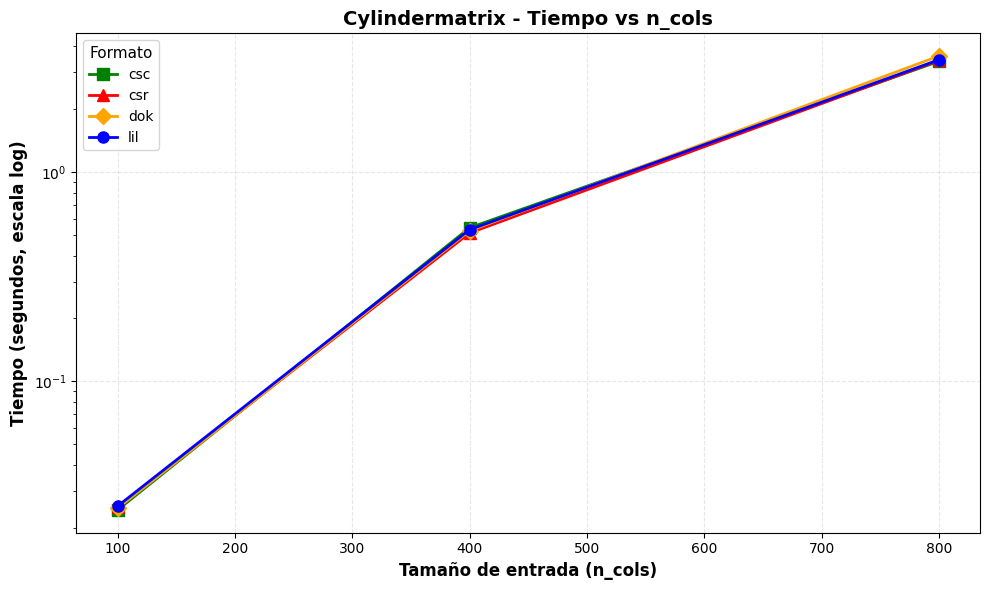

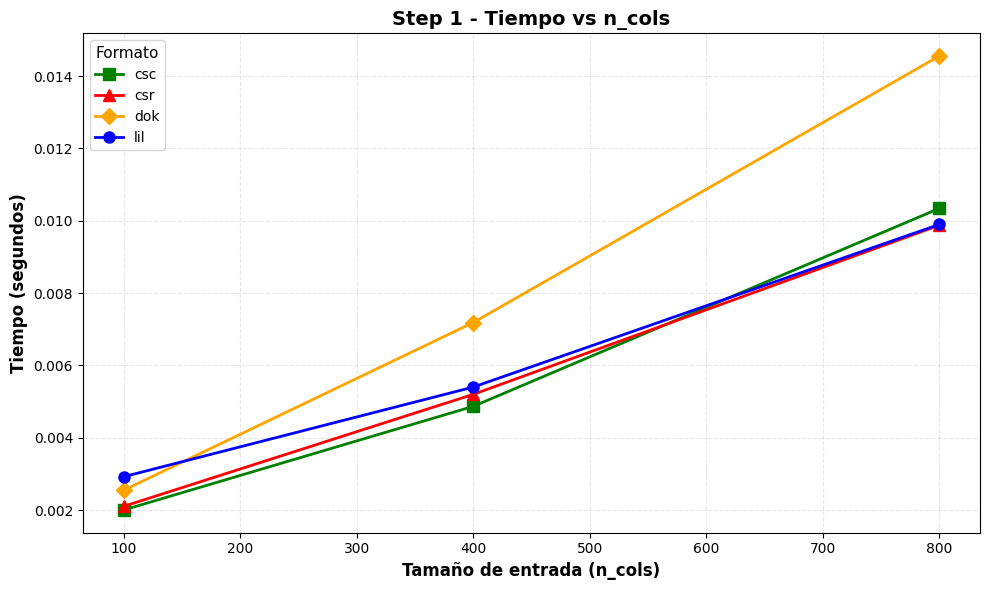

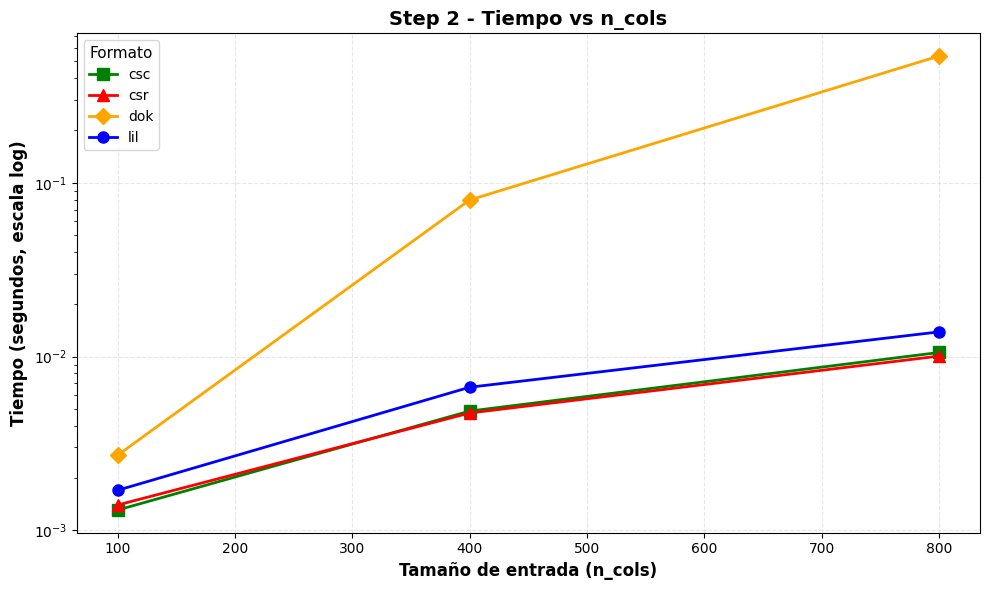

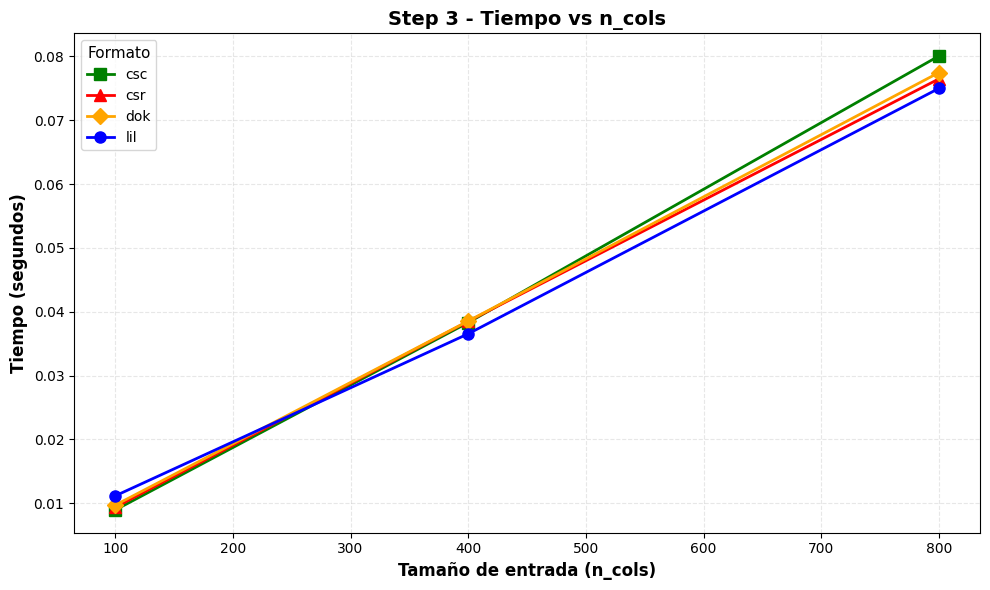

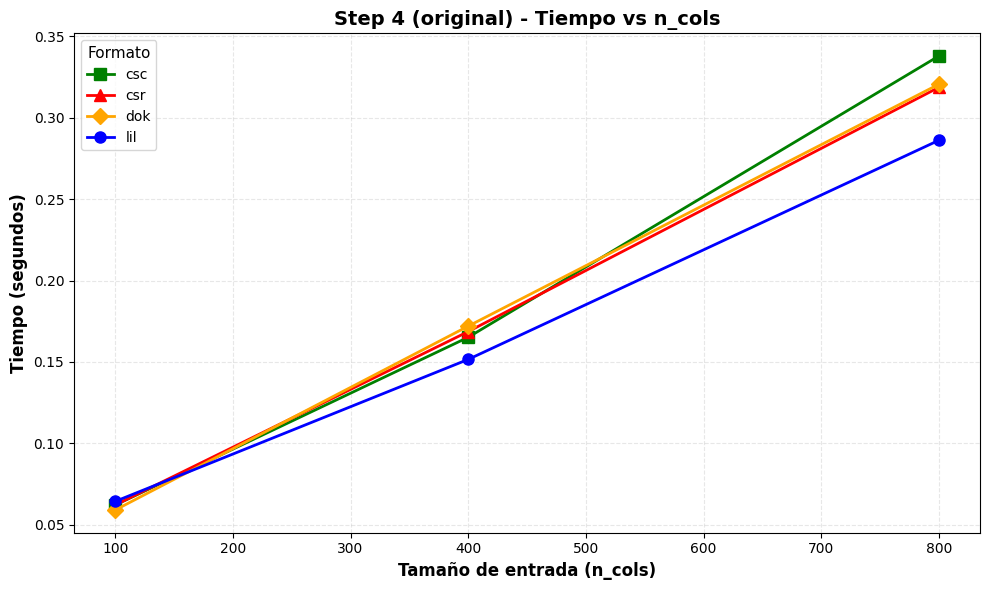

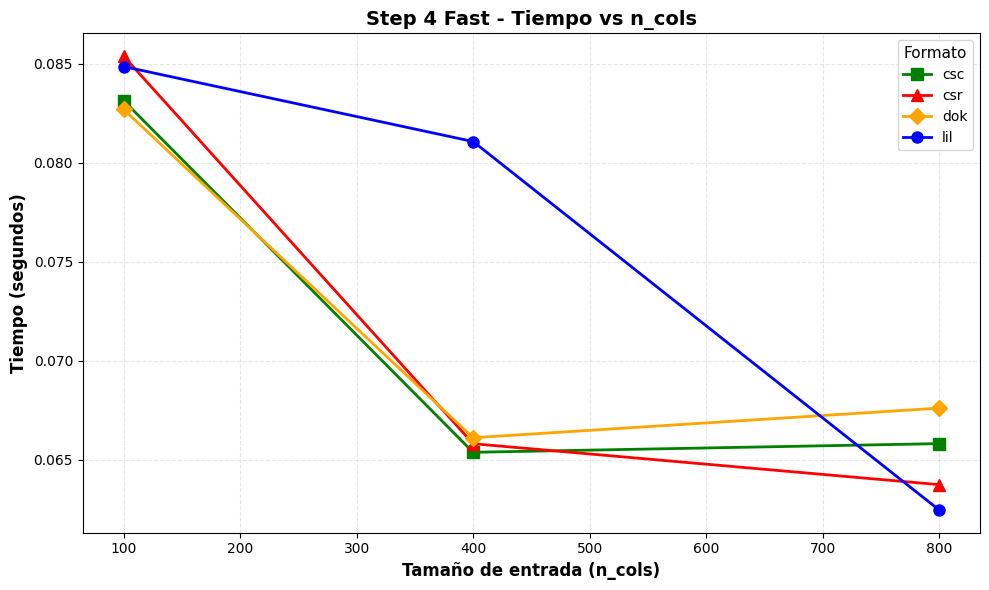

In [13]:
csv_path = 'benchmark.csv'  # El notebook está en results/, el CSV también
xaxis = 'n_cols'
outdir = 'plots'  # Guardar en results/plots/
show_plots = True

# Cargar datos
print(f"Cargando datos desde {csv_path}...")
df = load_and_clean_data(csv_path)
print(f"✓ Cargadas {len(df)} filas")

# Definir pasos a graficar
all_steps = [
    ('Cylindermatrix', 'cylindermatrix_time_s'),
    ('Step 1', 'step1_time_s'),
    ('Step 2', 'step2_time_s'),
    ('Step 3', 'step3_time_s'),
    ('Step 4 (original)', 'step4_time_s'),
    ('Step 4 Fast', 'step4_fast_time_s'),
]

# Generar gráficos
print(f"\nGenerando {len(all_steps)} gráficos...")
for step_name, time_col in all_steps:
    plot_step(df, step_name, time_col, 
                xaxis=xaxis, 
                outdir=outdir,
                show=show_plots)

